In [2]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

Considere um canal de comunicações cuja entrada é um sinal $x[k]$ e cuja saída é um sinal $r[k] = x[k-\delta] + n[k]$. Ou seja, a saída é uma versão ruidosa e atrasada da entrada. Seu objetivo aqui é determinar o valor do atraso $\delta$.

Para isso, vamos fazer algumas hipóteses. O sinal transmitido será composto de 10 valores consecutivos iguas a 1, sendo o restante igual a zero.

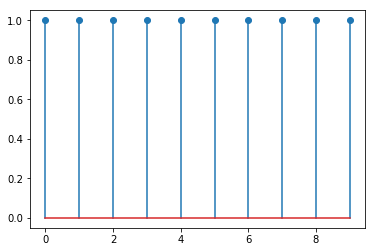

In [3]:
x = np.ones(10)
plt.stem(x)
plt.show()

A segunda hipótese é que o atraso é aleatório, sendo modelado como uma variável aleatória uniformemente distribuída entre 0 e 100 amostras.

In [7]:
d = np.random.randint(0, 100 + 1)
print(d)

28


Finalmente, vamos assumir que o ruído é normal, com média zero e variância $\sigma^2$, independente e identicamente distruído.

Observe que, como o atraso varia de 1 a cem amostras, é necessário observar uma janela 111 amostras do sinal recebido para termos certeza de que o sinal x foi observado dentro da janela.

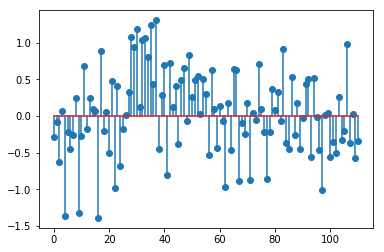

In [8]:
sigma = .5
r = sigma*np.random.randn(111)
r[d:(d+10)] += x
plt.stem(r)
plt.show()

Para determinar o atraso, você vai usar uma estratégia chamada máximo a posteriori: o valor de $\delta$ é aquele que é o mais provável no mundo em que o sinal $r[k]$ é observado. Para facilitar nossa notação, seja $\mathbf{r}$ um vetor contendo todas as 111 amostras de $r[k]$. Assim, o valor de $\delta$ será dado por 

$$\delta_{\mathrm{ótimo}} = \arg\max_{\delta} p_{\Delta|\mathbf{R}}(\delta|\mathbf{r})$$

Determine e implemente este detector. Busque fazer o maior número possível de simplificações. Você verá que existem diversas probabilidades e diversas funções que não precisam ser calculadas.

Imagine agora que o valor de $\delta$ seja 10. Calcule analiticamente e por simulação a probabilidade de seu detector ''preferir'' o valor de $\delta = 11$ ao invés do valor correto. Ou seja, calcule a probabilidade de $p_{\Delta|\mathbf{R}}(11|\mathbf{R}) > p_{\Delta|\mathbf{R}}(10|\mathbf{R})$.

Projeto 2 - Solução Daniel Freitas

Parte 1

$$\delta_{\mathrm{ótimo}} = \arg\max_{\delta} p_{\Delta|\mathbf{R}}(\delta|\mathbf{r})$$

$$ = \frac{f_{\Delta,\mathbf{R}}(\delta,r)}{f_(r)}$$

$$ = \frac{f_{\mathbf{R}|\Delta}(r|\delta) p_{\Delta}(\delta)}{f_{R}(r)}$$

Nesse caso, $p_{\Delta}(\delta)$ é constante, e equivale a $\frac{1}{101}$ e ${f_{R}(r)}$ é constante para um dada observação de $r$.


Sendo assim, para calcular qual o delta que maximiza a probabilidade $p_{\Delta|\mathbf{R}}(\delta|\mathbf{r})$ precisa-se olhar apenas para o termo referente ao $f_{\mathbf{R}|\Delta}(r|\delta)$.

Esse termo é calculado da seguinte maneira:

$$f_{\mathbf{R}|\Delta}(r|\delta) = \prod_{i=\delta}^{\delta+9} \frac{e^\frac{-1}{2}(\frac{r_i - 1}{\sigma})^2}{\sqrt{2\sigma^2pi}} \prod_{i \notin [\delta,\delta+9], i=0}^{110} \frac{e^\frac{-1}{2}(\frac{r_i}{\sigma})^2}{\sqrt{2\sigma^2pi}}$$

Assim, para se obter o $\delta$ ótimo, deve-se minimizar o argumento do expoente, pois isso maximiza a expressão acima.

$$ \delta_{ótimo} = \arg\min_{\delta} \sum_{i \notin [\delta,\delta+9], i=0}^{i=110}{r_i}^2 + \sum_{i=\delta}^{\delta+9}({r_i - 1})^2$$

In [16]:

sigma = .5
r = sigma*np.random.randn(111)
r[d:(d+10)] += x

deltas = []
aux = 1
for delta in range(0,100):
    for i in range(len(r)):
        if (i in range(delta,(delta + 10))):
            aux += (r[i] - 1)**2
        else:
            aux += r[i]**2
    deltas.append(aux)
    aux = 1
print("Estimated delta:",np.argmin(deltas),"  Right delta:",d)

Estimated delta: 66   Right delta: 66


Parte 2